Chargez les données disponibles à l'adresse suivante: url = https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip. Ce sont les données utilisées lors du checkpoint.

In [0]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip'
df = pd.read_csv(url)
df.head(2)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.0,C#,0.346,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.0,F#,0.151,-5.559,Minor,0.0868,174.003,4/4,0.816


Vérifiez la présence de valeurs nulles ou manquantes et afficher les types des différentes variables.

In [0]:
df.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

Réalisez un analyse en composantes principales. Pour cela: 
- sélectionnez les variables numériques pertinentes
- centrez et réduisez les données 
- appliquez l'ACP
- faites le graphique de la variance expliquée
- déterminez le nombre de composantes à garder 
- affichez la nouvelle table avec uniquement les composantes principales sélectionnées

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

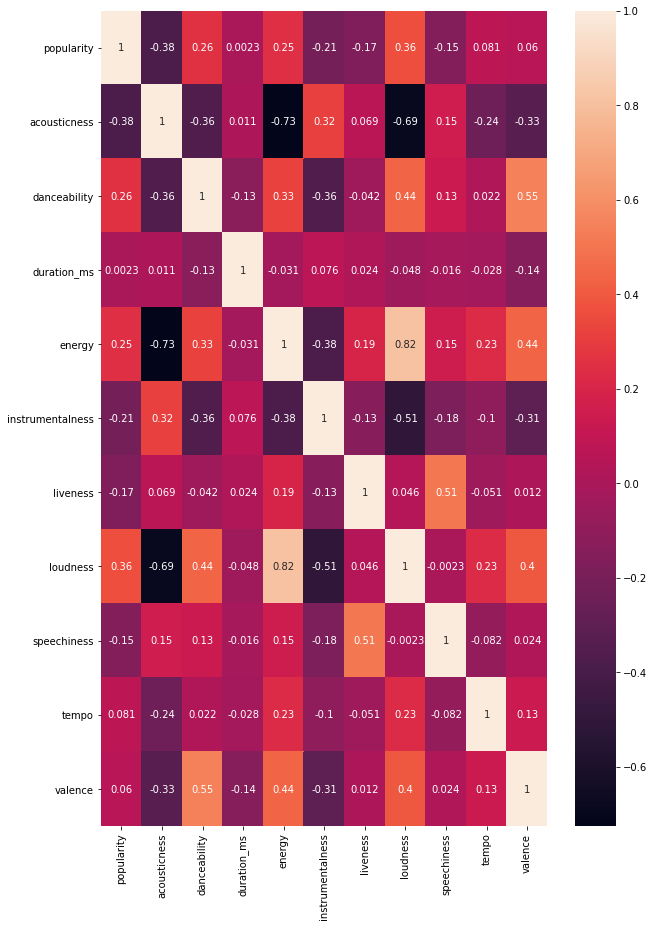

In [0]:
plt.figure(figsize=(10,15))
sns.heatmap(df.corr(), annot= True)

In [0]:
from sklearn.preprocessing import StandardScaler

X = df[['popularity',	'acousticness',	'danceability',	'duration_ms',	'energy'	,'instrumentalness', 'liveness'	,'loudness',	'speechiness',	'tempo',	'valence']]
scaler = StandardScaler()


In [0]:
X_scaled = scaler.fit_transform(X)

In [0]:
from sklearn.decomposition import PCA
pca = PCA()


In [0]:
Xpca = pca.fit_transform(X_scaled)

In [0]:
Xpca

array([[-0.99045021,  0.99939247, -0.15971079, ..., -0.57606002,
        -1.16234344,  0.04739106],
       [-1.20961308,  0.27304197, -0.6842291 , ...,  0.05743423,
        -0.09104391, -0.13059361],
       [ 2.1124023 ,  0.35316191, -1.86682122, ...,  0.8724981 ,
        -0.59542754, -0.0997507 ],
       ...,
       [ 0.32506902,  0.19737258, -1.67204781, ..., -1.47518739,
        -0.71435391, -0.34179443],
       [-1.06009706,  0.64113552, -0.34201002, ...,  0.57789031,
        -0.12977614,  0.2320321 ],
       [-0.74982873, -0.6666449 , -0.23754489, ...,  0.85888183,
         0.1452915 , -0.38296445]])

In [0]:
explained_variance = pca.explained_variance_ratio_

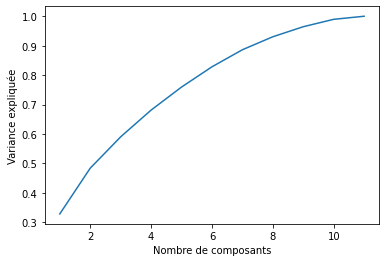

In [0]:
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composants')
plt.ylabel('Variance expliquée')
plt.show()

In [0]:
pca = PCA(n_components= 8)

In [0]:
Xpca = pca.fit_transform(X_scaled)

In [0]:
#colonne = ['popularity',	'acousticness',	'danceability',	'duration_ms',	'energy'	,'instrumentalness', 'liveness'	,'loudness',	'speechiness',	'tempo',	'valence']
# df2 = pd.DataFrame(pca.components_)
df2 = pd.DataFrame(Xpca)
df2

,0,1,2,3,4,5,6,7
0,-0.990450,0.999392,-0.159711,-3.096298,0.713255,-0.743454,-1.320100,-0.424621
1,-1.209613,0.273042,-0.684229,-2.729830,1.282702,-0.121344,-0.908359,0.447883
2,2.112402,0.353162,-1.866821,-0.266675,0.709725,0.399527,-1.462876,0.442066
3,1.954505,-0.186844,0.251315,-2.661387,-0.022116,0.606917,-1.793081,0.588281
4,2.935588,0.391576,-1.123134,-2.093773,-0.025188,0.415516,-1.123873,-0.255599
...,...,...,...,...,...,...,...,...
232720,-0.923589,-0.893221,-0.467573,0.010477,1.997912,-0.905657,1.179735,-0.221638
232721,-1.909356,-0.022248,-0.836774,0.211650,1.506918,-0.237733,-0.034687,-0.656179
232722,0.325069,0.197373,-1.672048,0.644906,0.064459,0.209526,-0.506902,-0.586735
232723,-1.060097,0.641136,-0.342010,0.663994,-0.065338,-0.214804,0.000050,-0.093235


Réalisez une projection des données dans le premier plan  factoriel (PC1 et PC2 en *x* et *y*) et colorez les morceaux par genre.

In [0]:

df3 = pd.concat([df2, df['genre']], axis=1)

In [0]:
df3

,0,1,2,3,4,5,6,7,genre
0,-0.990450,0.999392,-0.159711,-3.096298,0.713255,-0.743454,-1.320100,-0.424621,Movie
1,-1.209613,0.273042,-0.684229,-2.729830,1.282702,-0.121344,-0.908359,0.447883,Movie
2,2.112402,0.353162,-1.866821,-0.266675,0.709725,0.399527,-1.462876,0.442066,Movie
3,1.954505,-0.186844,0.251315,-2.661387,-0.022116,0.606917,-1.793081,0.588281,Movie
4,2.935588,0.391576,-1.123134,-2.093773,-0.025188,0.415516,-1.123873,-0.255599,Movie
...,...,...,...,...,...,...,...,...,...
232720,-0.923589,-0.893221,-0.467573,0.010477,1.997912,-0.905657,1.179735,-0.221638,Soul
232721,-1.909356,-0.022248,-0.836774,0.211650,1.506918,-0.237733,-0.034687,-0.656179,Soul
232722,0.325069,0.197373,-1.672048,0.644906,0.064459,0.209526,-0.506902,-0.586735,Soul
232723,-1.060097,0.641136,-0.342010,0.663994,-0.065338,-0.214804,0.000050,-0.093235,Soul


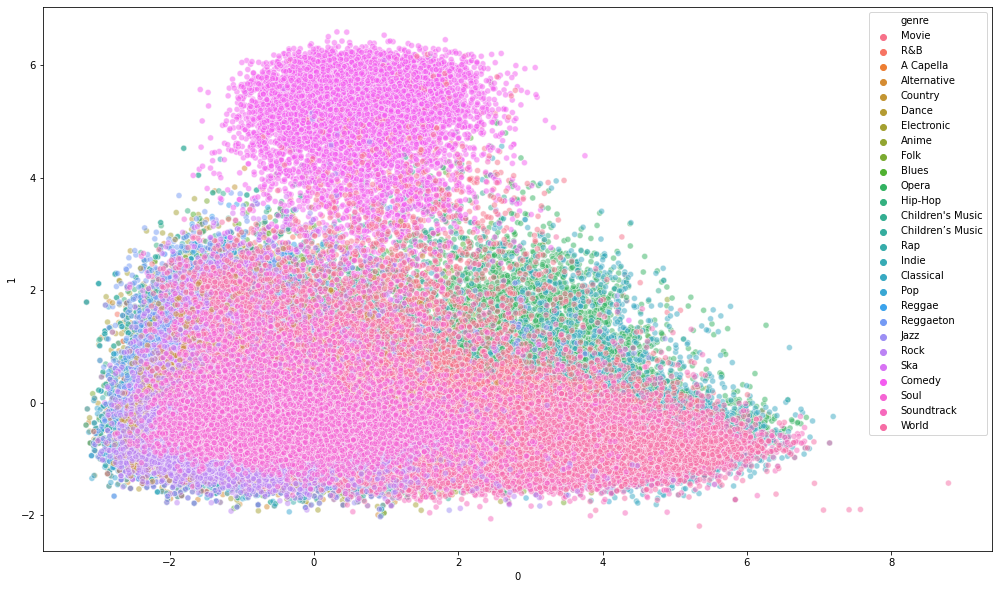

In [0]:
plt.figure(figsize=(17,10))
sns.scatterplot(x=df3[0], y= df3[1], hue ='genre', data=df3, alpha = 0.5)

Si vous avez terminé, réalisez le cercle des corrélations dans le premier plan factoriel.

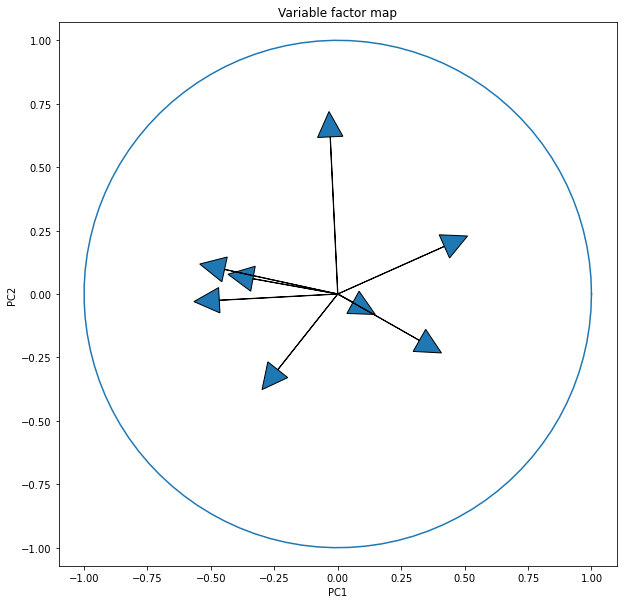

In [0]:
#@title
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(10, 10))
for i in range(0, len(pca.components_)):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    # plt.text(pca.components_[0, i] + 0.05,
    #         pca.components_[1, i] + 0.05,
    #         [i])

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()